In [61]:
#Title: Rats! An exploration of rodent activity in NYC (2015-)
#Aim: To review rodent instepctin data collected by the NYC Department of Health and Mental Hygiene (DOHMH) to identify hot spots and trends 
#Problem statement: Rats are a problem for residents, property owners, businesses and even entire neighborhoods. Damage caused by their gnawing and burrowing can contaminate food, spread disease and reduce ones quality of life.
#Why rats? As a former pest control technician servicing the 5 boroughs of NYC working for my father's "mom and pop" exterminating company (budgetexterminating.net), I wanted to bridge the gap between my past and current interests / professions. (Data, health, pest control) 
#Data source: NYC Department of Health and Mental Hygiene (DOHMH), Division of Environmental Health Pest Control Database
#Data location: https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj
#Data description : 2.39mil rows, 20 columns

In [62]:
#import libraries
import pandas as pd
import numpy as np 

In [63]:
#define dataframe(df) as data
df = pd.read_csv(r'C:\Users\PBerman\C-DRIVE (Documents)\Rats\Rodent_Inspection.csv')

In [64]:
#get a feel for the table structure and data
df.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,13407377,PC7882384,1,3.019260e+09,3,1926,10,NaN,NaN,11205.0,NaN,NaN,NaN,NaN,Brooklyn,06/09/2022 01:54:54 PM,Passed,06/13/2022 11:08:40 AM,NaN
1,Initial,13579860,PC8047096,1,1.004530e+09,1,453,34,NaN,NaN,10003.0,NaN,NaN,NaN,NaN,Manhattan,02/13/2023 01:40:15 PM,Rat Activity,02/14/2023 01:55:23 PM,NaN
2,BAIT,2799143,PC7647263,4,4.036190e+09,4,3619,1,NaN,NaN,11385.0,NaN,NaN,NaN,NaN,Queens,03/05/2021 10:40:58 AM,Bait applied,03/08/2021 10:47:56 AM,NaN
3,Initial,11631378,PC6155644,1,1.003760e+09,1,376,1,NaN,AVENUE C,10009.0,990053.0,202877.0,NaN,NaN,Manhattan,04/01/2010 04:11:45 PM,Failed for Other R,04/02/2010 09:08:37 AM,NaN
4,Initial,13511002,PC7978977,1,2.032370e+09,2,3237,12,BAILEY,AVENUE,0.0,NaN,NaN,NaN,NaN,Bronx,10/28/2022 03:00:57 PM,Passed,10/31/2022 11:06:49 AM,NaN


In [65]:
#get a feel for the column structure
df.columns

Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION'],
      dtype='object')

In [66]:
#get a feel for the unique data residing within columns
df['INSPECTION_TYPE'].unique()

array(['Initial', 'BAIT', 'Compliance', 'STOPPAGE', 'CLEAN_UPS'],
      dtype=object)

In [67]:
#get a feel for the unique data residing within columns
df['BOROUGH'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island', nan],
      dtype=object)

In [68]:
#get a feel for the unique data residing within columns
df['RESULT'].unique()

array(['Passed', 'Rat Activity', 'Bait applied', 'Failed for Other R',
       'Stoppage done', 'Monitoring visit', 'Cleanup done', nan],
      dtype=object)

In [69]:
#create a new dataframe with only select columns 
df2 = df[['JOB_TICKET_OR_WORK_ORDER_ID', 'BOROUGH','INSPECTION_TYPE', 'RESULT','INSPECTION_DATE',
          'LOCATION', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE', 'LONGITUDE']]

In [70]:
#groupby to see which borough has had the most inspection activity within this dataset's timeframe
result_by_borough = df2.groupby('BOROUGH')['RESULT'].count()
result_by_borough.head(10)

BOROUGH
Bronx            701640
Brooklyn         659359
Manhattan        760069
Queens           207698
Staten Island     60558
Name: RESULT, dtype: int64

In [71]:
#groupby to see the relationship between INSPECTION_TYPE & RESULT
inspection_type_result = df2.groupby(['INSPECTION_TYPE','RESULT'])['RESULT'].count()
inspection_type_result.head(10)

INSPECTION_TYPE  RESULT            
BAIT             Bait applied           324067
                 Monitoring visit        48948
CLEAN_UPS        Cleanup done             1828
Compliance       Failed for Other R      58675
                 Passed                 166293
                 Rat Activity           119150
Initial          Failed for Other R     159655
                 Passed                1268606
                 Rat Activity           238650
STOPPAGE         Stoppage done            3722
Name: RESULT, dtype: int64

In [81]:
#converting timestamp object into date using to_datetime
import datetime
from datetime import datetime
df2['INSPECTION_DATE'] = pd.to_datetime(df2['INSPECTION_DATE']).dt.date
df2.head(5)

<ipython-input-81-7754f0dc9378>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['INSPECTION_DATE'] = pd.to_datetime(df2['INSPECTION_DATE']).dt.date


,JOB_TICKET_OR_WORK_ORDER_ID,BOROUGH,INSPECTION_TYPE,RESULT,INSPECTION_DATE,LOCATION,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE
0,13407377,Brooklyn,Initial,Passed,2022-06-09,NaN,11205.0,NaN,NaN,NaN,NaN
1,13579860,Manhattan,Initial,Rat Activity,2023-02-13,NaN,10003.0,NaN,NaN,NaN,NaN
2,2799143,Queens,BAIT,Bait applied,2021-03-05,NaN,11385.0,NaN,NaN,NaN,NaN
3,11631378,Manhattan,Initial,Failed for Other R,2010-04-01,NaN,10009.0,990053.0,202877.0,NaN,NaN
4,13511002,Bronx,Initial,Passed,2022-10-28,NaN,0.0,NaN,NaN,NaN,NaN


In [72]:
#from the result of the data exploration thus far, based on the description and relationship of the data:
    #RESULT: all values other than Rat Activity will be purged
df3 = df2[(df2['RESULT']=='Rat Activity')] 

In [73]:
#groupby to see which borough has had the most activity within this dataset's timeframe in descending order
result_by_borough2 = df3.groupby('BOROUGH')['RESULT'].count()
print(result_by_borough2.sort_values(ascending=False))

BOROUGH
Brooklyn         111656
Bronx            110331
Manhattan        109266
Queens            23111
Staten Island      3435
Name: RESULT, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


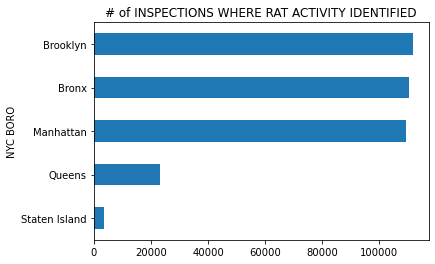

In [74]:
#Python visual: # of INSPECTIONS WHERE RAT ACTIVITY IDENTIFIED by Boro
print(result_by_borough2.sort_values(ascending=True).plot(kind='barh',xlabel='NYC BORO', title='# of INSPECTIONS WHERE RAT ACTIVITY IDENTIFIED'))

In [75]:
#Statistics on RAT ACTIVITY count
result_by_borough2.describe()

count         5.000000
mean      71559.800000
std       53667.828629
min        3435.000000
25%       23111.000000
50%      109266.000000
75%      110331.000000
max      111656.000000
Name: RESULT, dtype: float64

#export of df2 data that can be used in tableau where 'INSPECTION_DATE' timestamp object was transformed to a date
df2.to_csv (r'C:\Users\PBerman\Downloads\RatsExport.csv', index=None)



In [77]:
#the following analysis work was done in tableau and will provided with the final powerpoint.